In [2]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import UnivariateSpline
from scipy.optimize import curve_fit
from scipy import stats

In [3]:
#arrays replicas
cfp1=np.fromfile('CFPC3', sep=',')
rfp1=np.fromfile('RFPC3', sep=',')
yfp1=np.fromfile('YFPC3', sep=',')
od1=np.fromfile('ODC3', sep=',')
cfp2=np.fromfile('CFPC4', sep=',')
rfp2=np.fromfile('RFPC4', sep=',')
yfp2=np.fromfile('YFPC4', sep=',')
od2=np.fromfile('ODC4', sep=',')
cfp3=np.fromfile('CFPC5', sep=',')
rfp3=np.fromfile('RFPC5', sep=',')
yfp3=np.fromfile('YFPC5', sep=',')
od3=np.fromfile('ODC5', sep=',')
cfp4=np.fromfile('CFPC6', sep=',')
rfp4=np.fromfile('RFPC6', sep=',')
yfp4=np.fromfile('YFPC6', sep=',')
od4=np.fromfile('ODC6', sep=',')
cfp5=np.fromfile('CFPC7', sep=',')
rfp5=np.fromfile('RFPC7', sep=',')
yfp5=np.fromfile('YFPC7', sep=',')
od5=np.fromfile('ODC7', sep=',')
cfp6=np.fromfile('CFPD3', sep=',')
rfp6=np.fromfile('RFPD3', sep=',')
yfp6=np.fromfile('YFPD3', sep=',')
od6=np.fromfile('ODD3', sep=',')
cfp7=np.fromfile('CFPD4', sep=',')
rfp7=np.fromfile('RFPD4', sep=',')
yfp7=np.fromfile('YFPD4', sep=',')
od7=np.fromfile('ODD4', sep=',')
cfp8=np.fromfile('CFPD5', sep=',')
rfp8=np.fromfile('RFPD5', sep=',')
yfp8=np.fromfile('YFPD5', sep=',')
od8=np.fromfile('ODD5', sep=',')
cfp9=np.fromfile('CFPD6', sep=',')
rfp9=np.fromfile('RFPD6', sep=',')
yfp9=np.fromfile('YFPD6', sep=',')
od9=np.fromfile('ODD6', sep=',')
cfp10=np.fromfile('CFPD7', sep=',')
rfp10=np.fromfile('RFPD7', sep=',')
yfp10=np.fromfile('YFPD7', sep=',')
od10=np.fromfile('ODD7', sep=',')
tt=np.fromfile('t', sep=',')

#Promedios controles glucosa
cfpc=np.fromfile('pcgCFP', sep=',')
rfpc=np.fromfile('pcgRFP', sep=',')
yfpc=np.fromfile('pcgYFP', sep=',')
odc=np.fromfile('pcgOD', sep=',')

#Promedio arrays y desv estándar
cfpp=np.fromfile('pptsgCFP', sep=',')
rfpp=np.fromfile('pptsgRFP', sep=',')
yfpp=np.fromfile('pptsgYFP', sep=',')
odp=np.fromfile('pptsgOD', sep=',')
print(cfpp.shape)
print(rfpp.shape)
print(yfpp.shape)
print(odp.shape)
print(tt.shape)


(97,)
(97,)
(97,)
(97,)
(97,)


In [3]:
#Funciones para ajuste Gompertz
def F_sigma(t, A, um,l):
    return ((A*np.exp(-np.exp((((um*np.exp(1))/A)*(l-t))+1))))

def Function_fit(xdata,ydata,init,end,func=F_sigma,ParamBounds=([0,0,0],[3,1,300])):
        Y_fit={}

        z,_=curve_fit(func,xdata[init:end], ydata[init:end],bounds=ParamBounds)

        print(z)

        evalF=func(xdata,z[0],z[1],z[2])

        plt.plot(xdata, ydata, '.',xdata, evalF, '-')

        plt.title('')

        plt.show()

        Y_fit=evalF,z

        return(Y_fit)

Min OD = 8.280000e-02
[  2.24075080e+00   9.58089970e-03   1.98256523e+02]


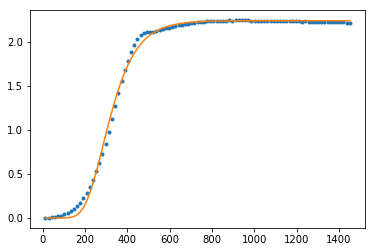

A=2.240751e+00
um=9.580900e-03
l=1.982565e+02
Tm=2.842950e+02
doubpe=7.234677e+01
ext=1.446935e+02
Tfinal=4.289886e+02


In [4]:
#Ajuste de datos con modelo Gompertz y obtención de parámetros para el ajuste
#Function_fit(xdata,ydata,init,end,func=F_sigma,ParamBounds=([1,-np.inf,0.1],[np.inf,-1,1]))
y = np.log(odp)-np.log(np.min(odp))
print('Min OD = %e'%((np.min(odp))))
evaly, params=Function_fit(tt,y,0,-1)
A = params[0]
um=params[1]
l=params[2]
print('A=%e'%(A))
print('um=%e'%(um))
print('l=%e'%(l))

#Cálculo datos para determinar extensión de la fase exponencial
tm=((A/(np.exp(1)*um))+l)
print('Tm=%e'%(tm))
t2=((np.log(2))/um)
print('doubpe=%e'%(t2))
extdp=2*t2
print('ext=%e'%extdp)
ttot=tm+extdp
print('Tfinal=%e'%ttot)

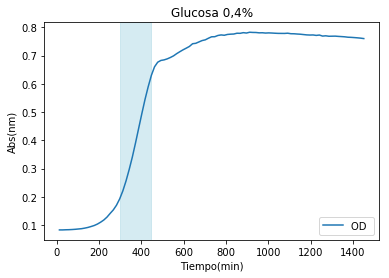

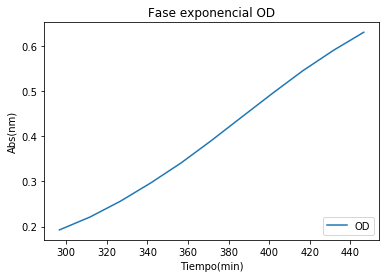

In [5]:
#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[19]
y2=tt[29]
plt.figure()
plt.title('Glucosa 0,4%')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,odp,label='OD ')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo
plt.figure()
plt.title('Fase exponencial OD')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[19:30],odp[19:30],label='OD')
plt.legend(loc='lower right')

In [6]:
#Selección de datos en arrays, según lo determinado
o=odp[19:30]
t=tt[19:30]
cp=cfpp[19:30]
rp=rfpp[19:30]
yp=yfpp[19:30]


slope=2.544549e+04
intercept=4.740899e+03
p-value=3.877487e-09
r-squared: 0.981779623789
std_err=1.155477e+03
y=(2.544549e+04)x+(4.740899e+03)


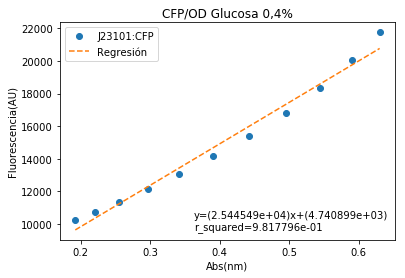

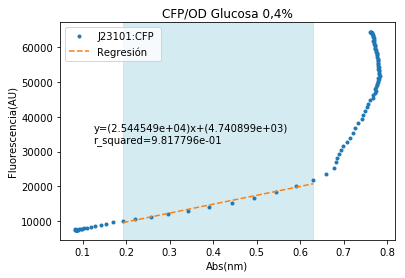

In [7]:
#Regresión lineal, evaluación de regresión con OD, gráfico de regresión (Ejemplo con CFP)
slope, intercept, r_value, p_value,std_err=stats.linregress(o,cp)
slopecp=slope
print('slope=%e'%slopecp)
print('intercept=%e'%intercept)
print('p-value=%e'%p_value)
print("r-squared:",r_value**2)
print('std_err=%e'%std_err)

regcp=((slope*o)+intercept)
print('y=(%e)x+(%e)'%(slope, intercept))
regcpstr=('y=(%e)x+(%e)'%(slope, intercept))
cprval2='r_squared=%e'%(r_value**2)

plt.figure()
plt.title('CFP/OD Glucosa 0,4%')
plt.xlabel('Abs(nm)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(o,cp,'o',label='J23101:CFP')       
plt.plot(o,regcp,'--',label='Regresión')
plt.annotate(str(regcpstr), xy=(0.4, 0.1), xycoords='axes fraction')
plt.annotate(str(cprval2),xy=(0.4,0.05),xycoords='axes fraction')
plt.legend(loc='upper left')

#Delimitacion datos en CFP/OD (Ejemplo con CFP)
y1=odp[19]
y2=odp[29]
plt.figure()
plt.title('CFP/OD Glucosa 0,4%')
plt.xlabel('Abs(nm)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(odp,cfpp,'.',label='J23101:CFP ')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.plot(o,regcp,'--',label='Regresión')
plt.annotate(str(regcpstr), xy=(0.1, 0.5), xycoords='axes fraction')
plt.annotate(str(cprval2),xy=(0.1,0.45),xycoords='axes fraction')
plt.legend(loc='upper left')


slope=2.455632e+04
intercept=1.464685e+04
p-value=7.314440e-11
r-squared: 0.992452723167
std_err=7.138094e+02
y=(2.455632e+04)x+(1.464685e+04)


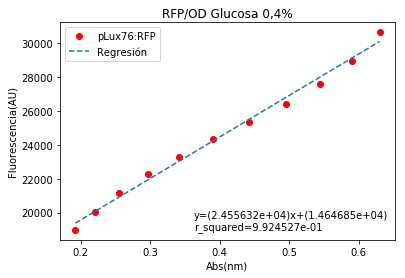

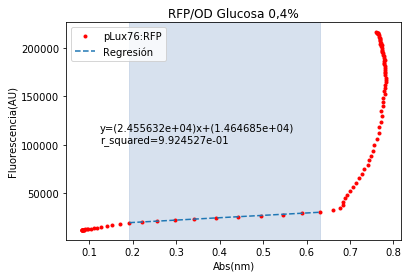

In [12]:
#RFP
slope, intercept, r_value, p_value,std_err=stats.linregress(o,rp)
sloperp=slope
print('slope=%e'%sloperp)
print('intercept=%e'%intercept)
print('p-value=%e'%p_value)
print("r-squared:",r_value**2)
print('std_err=%e'%std_err)

regrp=((slope*o)+intercept)
print('y=(%e)x+(%e)'%(slope, intercept))
regrpstr=('y=(%e)x+(%e)'%(slope, intercept))
rprval2='r_squared=%e'%(r_value**2)

plt.figure()
plt.title('RFP/OD Glucosa 0,4%')
plt.xlabel('Abs(nm)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(o,rp,'ro',label='pLux76:RFP')       
plt.plot(o,regrp,'--',label='Regresión')
plt.annotate(str(regrpstr), xy=(0.4, 0.1), xycoords='axes fraction')
plt.annotate(str(rprval2),xy=(0.4,0.05),xycoords='axes fraction')
plt.legend(loc='upper left')


#Delimitacion datos en RFP/OD
y1=odp[19]
y2=odp[29]
plt.figure()
plt.title('RFP/OD Glucosa 0,4%')
plt.xlabel('Abs(nm)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(odp,rfpp,'r.',label='pLux76:RFP')
plt.axvspan(y1,y2, color='lightsteelblue', alpha=0.5)
plt.plot(o,regrp,'--',label='Regresión')
plt.annotate(str(regrpstr), xy=(0.1, 0.5), xycoords='axes fraction')
plt.annotate(str(rprval2),xy=(0.1,0.45),xycoords='axes fraction')
plt.legend(loc='upper left')

slope=1.866956e+05
intercept=2.796122e+04
p-value=1.060582e-11
r-squared: 0.995084915536
std_err=4.373693e+03
y=(1.866956e+05)x+(2.796122e+04)


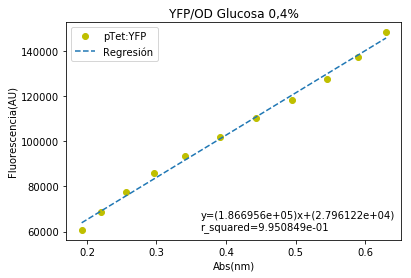

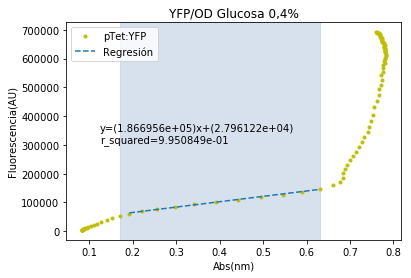

In [13]:
#YFP
slope, intercept, r_value, p_value,std_err=stats.linregress(o,yp)
slopeyp=slope
print('slope=%e'%slopeyp)
print('intercept=%e'%intercept)
print('p-value=%e'%p_value)
print("r-squared:",r_value**2)
print('std_err=%e'%std_err)

regyp=((slope*o)+intercept)
print('y=(%e)x+(%e)'%(slope, intercept))
regypstr=('y=(%e)x+(%e)'%(slope, intercept))
yprval2='r_squared=%e'%(r_value**2)

plt.figure()
plt.title('YFP/OD Glucosa 0,4%')
plt.xlabel('Abs(nm)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(o,yp,'yo',label='pTet:YFP')       
plt.plot(o,regyp,'--',label='Regresión')
plt.annotate(str(regypstr), xy=(0.4, 0.1), xycoords='axes fraction')
plt.annotate(str(yprval2),xy=(0.4,0.05),xycoords='axes fraction')
plt.legend(loc='upper left')


#Delimitacion datos en YFP/OD
y1=odp[18]
y2=odp[29]
plt.figure()
plt.title('YFP/OD Glucosa 0,4%')
plt.xlabel('Abs(nm)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(odp,yfpp,'y.',label='pTet:YFP')
plt.axvspan(y1,y2, color='lightsteelblue', alpha=0.5)
plt.plot(o,regyp,'--',label='Regresión')
plt.annotate(str(regypstr), xy=(0.1, 0.5), xycoords='axes fraction')
plt.annotate(str(yprval2),xy=(0.1,0.45),xycoords='axes fraction')
plt.legend(loc='upper left')


([<matplotlib.axis.XTick at 0x22e27ac72b0>,
 <a list of 3 Text xticklabel objects>)

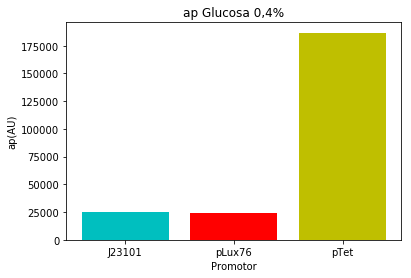

In [10]:
pendientes= [slopecp,sloperp,slopeyp]
X = [1,2,3]
plt.figure()
plt.title('ap Glucosa 0,4%')
plt.xlabel('Promotor')
plt.ylabel('ap(AU)')
plt.bar(X[0],pendientes[0],color='c')
plt.bar(X[1],pendientes[1],color='r')
plt.bar(X[2],pendientes[2],color='y')
plt.xticks(X, ["J23101",'pLux76',"pTet"])

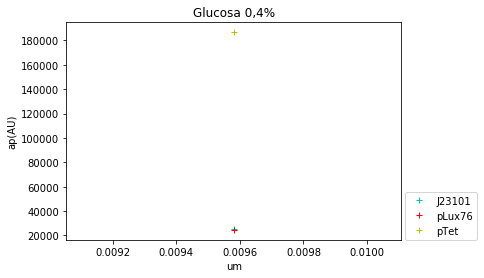

In [11]:
#grafico de ay versus Um
plt.figure()
plt.title('Glucosa 0,4%')
plt.xlabel('um')
plt.ylabel('ap(AU)')
plt.plot(um,slopecp,'c+',label='J23101')
plt.plot(um,sloperp,'r+',label='pLux76')
plt.plot(um,slopeyp,'y+',label='pTet')
plt.legend(loc=(1.01,0.0))